### 다중선형 회귀분석(Multiple Linear Regression)
##### - 모델 생성 : statsmodels의 smf 라이브러리의 ols() 함수를 이용
##### - 독립변수(x) - 연속형, .....종속변수(y) - 연속형.
##### - 독립변수(x)는 [여러 개(복수)] 사용한다

### exe-1) 음료수 만족도에 영향을 미치는 요인 분석

In [1]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

In [2]:
### 데이터 생성하기

df = pd.read_csv('./data/drinking_water.csv')
print(len(df), "\n", df.head(3), '\n', df.describe())

264 
    친밀도  적절성  만족도
0    3    4    3
1    3    3    2
2    4    4    4 
               친밀도         적절성         만족도
count  264.000000  264.000000  264.000000
mean     2.928030    3.132576    3.094697
std      0.970345    0.859657    0.828744
min      1.000000    1.000000    1.000000
25%      2.000000    3.000000    3.000000
50%      3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000


In [3]:
### 상관관계 분석

# [만족도]와 상관관계가 높은 항목은 [적절성] : 0.766853
# [만족도]와 [친밀도]는 : 0.499209로 [적절성] 보다는 낮다
print(df.corr()) 

          친밀도       적절성       만족도
친밀도  1.000000  0.499209  0.467145
적절성  0.499209  1.000000  0.766853
만족도  0.467145  0.766853  1.000000


In [4]:
### 모델 객체 생성 및 학습모델 생성하기

# 모델 생성에 사용할 라이브러리 불러들이기
import statsmodels.formula.api as smf

# 만족도와 상관관계가 높은 적절성 데이터를 사용하여
#  - 종속변수(y) = 만족도 사용
#  - 독립변수(x) = 적절성 및 친밀도 사용(여러 개 사용)
formulas = "만족도 ~ 적절성 + 친밀도"

### 학습모델 생성하기
model = smf.ols(formula = formulas, data=df).fit()
print("model = \n", model)
print("---------------------------")

### 학습모델 결과 확인하기 : summary()
print("학습모델 결과 = \n", model.summary())
print("-------------------------------")

# print("지수값을 실수값으로 표현 : 7.29e-15 = {:.9f}".format(7.29e-15))
# print("-------------------------------")

# - R-squared : 결정계수(1에 까가울 수록 학습모델이 좋은 것임)
#   (결정계수는 예측을 얼마나 잘 할 수 있을까로 해설할 수도 있다.)
# - Adj. R-squared : 수정결정계수(1에 까가울 수록 학습모델이 좋은 것임) : 0.598
# - *** 독립변수가 많을 경우 R-squared과 Adj. R-squared의 차이가 클 경우 
#       독립변수 [이상치를 확인]해야한다. ***

# -  p-value : 독립변수 모두 < 0.05 => 모델은 유효하다.
#     --> 적절성 p-value : 0.000 < 0.005
#     --> 친밀도 p-value : 0.014 < 0.005
# - 적절성의 std err(표준 오차)
# - 적절성의 Intercept(y절편) : 0.6673
# -  coef(기울기) 
#    --> 적절성 : 0.685224
#    --> 친밀도 : 0.095926
# - 적정성의 Kurtosis : 3.992 => 일반적으로 3보다 클경우,
#   평균에 데이터가 몰려있다고 판단한다.
#   kurtosis() 첨도는 확률분포에서 분포의 [뾰족한 정도]를 나타내는 [척도]입니다. 
#   --> 첨도가 높은 경우: 데이터의 분포가 평균(혹은 중심)에 많이 몰려 있어 뾰족하다


### 위 학습결과(summary())의 내용의 데이터 추출해 보기.....

### y절편(b)과 기울기(a) 산출
# 회귀식 y = a * x + b
# y절편(Intercept) : 힌게 데이터 조회
# 기울기  : 사용된 독립변수의 갯수 만큼 조회됨

b, a1, a2 = model.params

print("y절편(b) = {} / 적절성 기울기(a1) = {} / 친밀도 기울기(a2) = {}"\
          .format(b, a1, a2))
print("-------------------------------")

### 결정계수(R-squared)
# - 단순 회귀분석의 결정계수 보다 조금 높게 나옴
rsquared = model.rsquared
print("결정계수(R-squared) = ", rsquared) 
print("-------------------------------")

### 유의수준(p-value)
print("유의수준(p-value) = {:.3f}".format(model.pvalues[0]))

### (해석)
# - 생성한 학습모델에 사용된 독립변수는
# - 유의수준 p-value는 모든 독립변수 < 0.05 으로 유의미 하다.
# - 결정계수(R-squared) 0.598 > 0.05  => 의미있는 학습모델
# - 하지만, 예측 시에 정확도가 다소 낮을 수 있다.

model = 
---------------------------
학습모델 결과 = 
                             OLS Regression Results                            
Dep. Variable:                    만족도   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     193.8
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.61e-52
Time:                        10:35:40   Log-Likelihood:                -204.37
No. Observations:                 264   AIC:                             414.7
Df Residuals:                     261   BIC:                             425.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

In [5]:
### 예측(테스트) 하기

# 테스트 데이터 생성
x_test = df[["적절성", "친밀도"]][:5]

# 실제 데이터 생성(예측 결과 확인하기 위해)
y_test = df[["만족도"]][:5]

### 예측(테스트)하기
y_pred = model.predict(x_test)

### 결과 확인해 보기
print("예측값(y_pred) = \n", y_pred)
print("-------------------------------")

print("실제값(y) = \n", y_test)

예측값(y_pred) = 
 0    3.695980
1    3.010757
2    3.791906
3    2.229608
4    2.229608
dtype: float64
-------------------------------
실제값(y) = 
    만족도
0    3
1    2
2    4
3    2
4    2


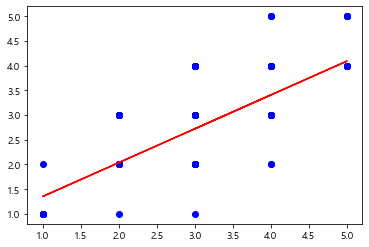

In [6]:
### 적절성 시각화 하기

# 적절성에 대한 산점도로 실제 데이터 표시하기
plt.scatter(df.적절성, df.만족도, c="blue")

# 적절성에 대한 회귀공식(a * x + b) 적용하여 [추세선] 그리기
plt.plot(df.적절성, a1 * df.적절성 + b, 'red')

plt.show()

### 전체적인 데이터의 분포가 학습모델 결과의 회귀식에 의해
#   그려진 추세선과 선형을 띄고는 있으나, 거리가 다소 멀리 분포하며,
#   - 이는 데이터 예측 정확도가 다소 낮을 수 있음을 의미함
#   - 따라서, 해당 학습모델을 사용하는 것은 고민해 볼 필요성이 있다.

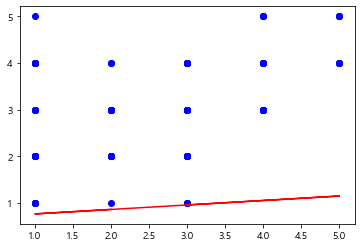

In [7]:
### 친밀도 시각화 하기

# 친밀도에 대한 산점도로 실제 데이터 표시하기
plt.scatter(df.친밀도, df.만족도, c="blue")

# 회귀공식(a * x + b) 적용하여 [추세선] 그리기
plt.plot(df.친밀도, a2 * df.친밀도 + b, 'red') 

plt.show()

### 전체적인 데이터의 분포가 학습모델 결과의 회귀식에 의해
#   그려진 추세선과 거리가 상당히 멀리 분포하며,
#   - 이는 데이터 예측 정확도가 다소 낮을 수 있음을 의미함
#   - 따라서, 해당 학습모델을 사용하는 것은 고민해 볼 필요성이 있다.

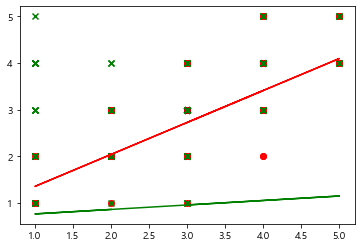

In [8]:
### 적절성 및 친밀도 모두 시각화 하기

# 적절성에 대한 산점도로 실제 데이터 표시하기
plt.scatter(df.적절성, df.만족도, c="red", marker="o")

# 적절성에 대한 회귀공식(a * x + b) 적용하여 [추세선] 그리기
plt.plot(df.적절성, a1 * df.적절성 + b, 'red')

# 친밀도에 대한 산점도로 실제 데이터 표시하기
plt.scatter(df.친밀도, df.만족도, c="green", marker="x")

# 회귀공식(a * x + b) 적용하여 [추세선] 그리기
plt.plot(df.친밀도, a2 * df.친밀도 + b, 'green') 

plt.show()

### 전체적인 데이터의 분포가 학습모델 결과의 회귀식에 의해
#   그려진 추세선과 거리가 상당히 멀리 분포하며,
#   - 이는 데이터 예측 정확도가 다소 낮을 수 있음을 의미함
#   - 따라서, 해당 학습모델을 사용하는 것은 고민해 볼 필요성이 있다.